#Figure: Spectrum of sexual dimorphism on gene expression

A complex figure composed of %DE genes (bar plot) + overall tSNR (line plot) + chromosomal tSNR (heatmap).

Scripts adapted from `DE_gene_lists.ipynb` and `tSNR_by_chromosome.ipynb`.

In [1]:
# Built-ins
import sys, os, os.path

# Anaconda
from pylab import *
import pandas as pd
import seaborn as sns

##Data source

In [52]:
xls = pd.read_excel("reports/DE_gene_lists.summary.xlsx", usecols=['Tissue', 'TSNR', '%FDR0.05'], index_col="Tissue")
df  = pd.read_excel('reports/tSNR_by_chromosome.xlsx')

##Setup

In [53]:
chr_noxymt = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', \
              '14', '15', '16', '17', '18', '19', '20', '21', '22']

Set the order of tissues: by %FDR0.05 or by overall tSNR?

In [59]:
t = xls.sort('%FDR0.05')
df2 = df[t.index[::-1]].T

Set the element colors:

In [39]:
LINE_COLOR = sns.color_palette()[2]

Set the heatmap tSNR range:

In [75]:
VMIN = -2.75  # 0.75
VMAX = 2.75  # 6.25

Shorten some tissue names:

In [72]:
tiss_abbr = {'adipose_visceral_(omentum)': 'adipose_visceral',
             'cells_ebv-transformed_lymphocytes': 'cells_ebv_lymphocytes',
             'cells_transformed_fibroblasts': 'cells_fibroblasts',
             'esophagus_gastroesophageal_junction': 'esophagus_GEJ',
             'small_intestine_terminal_ileum': 'small_intestine_TI'}
t.rename(index=tiss_abbr, inplace=True)

##Plot

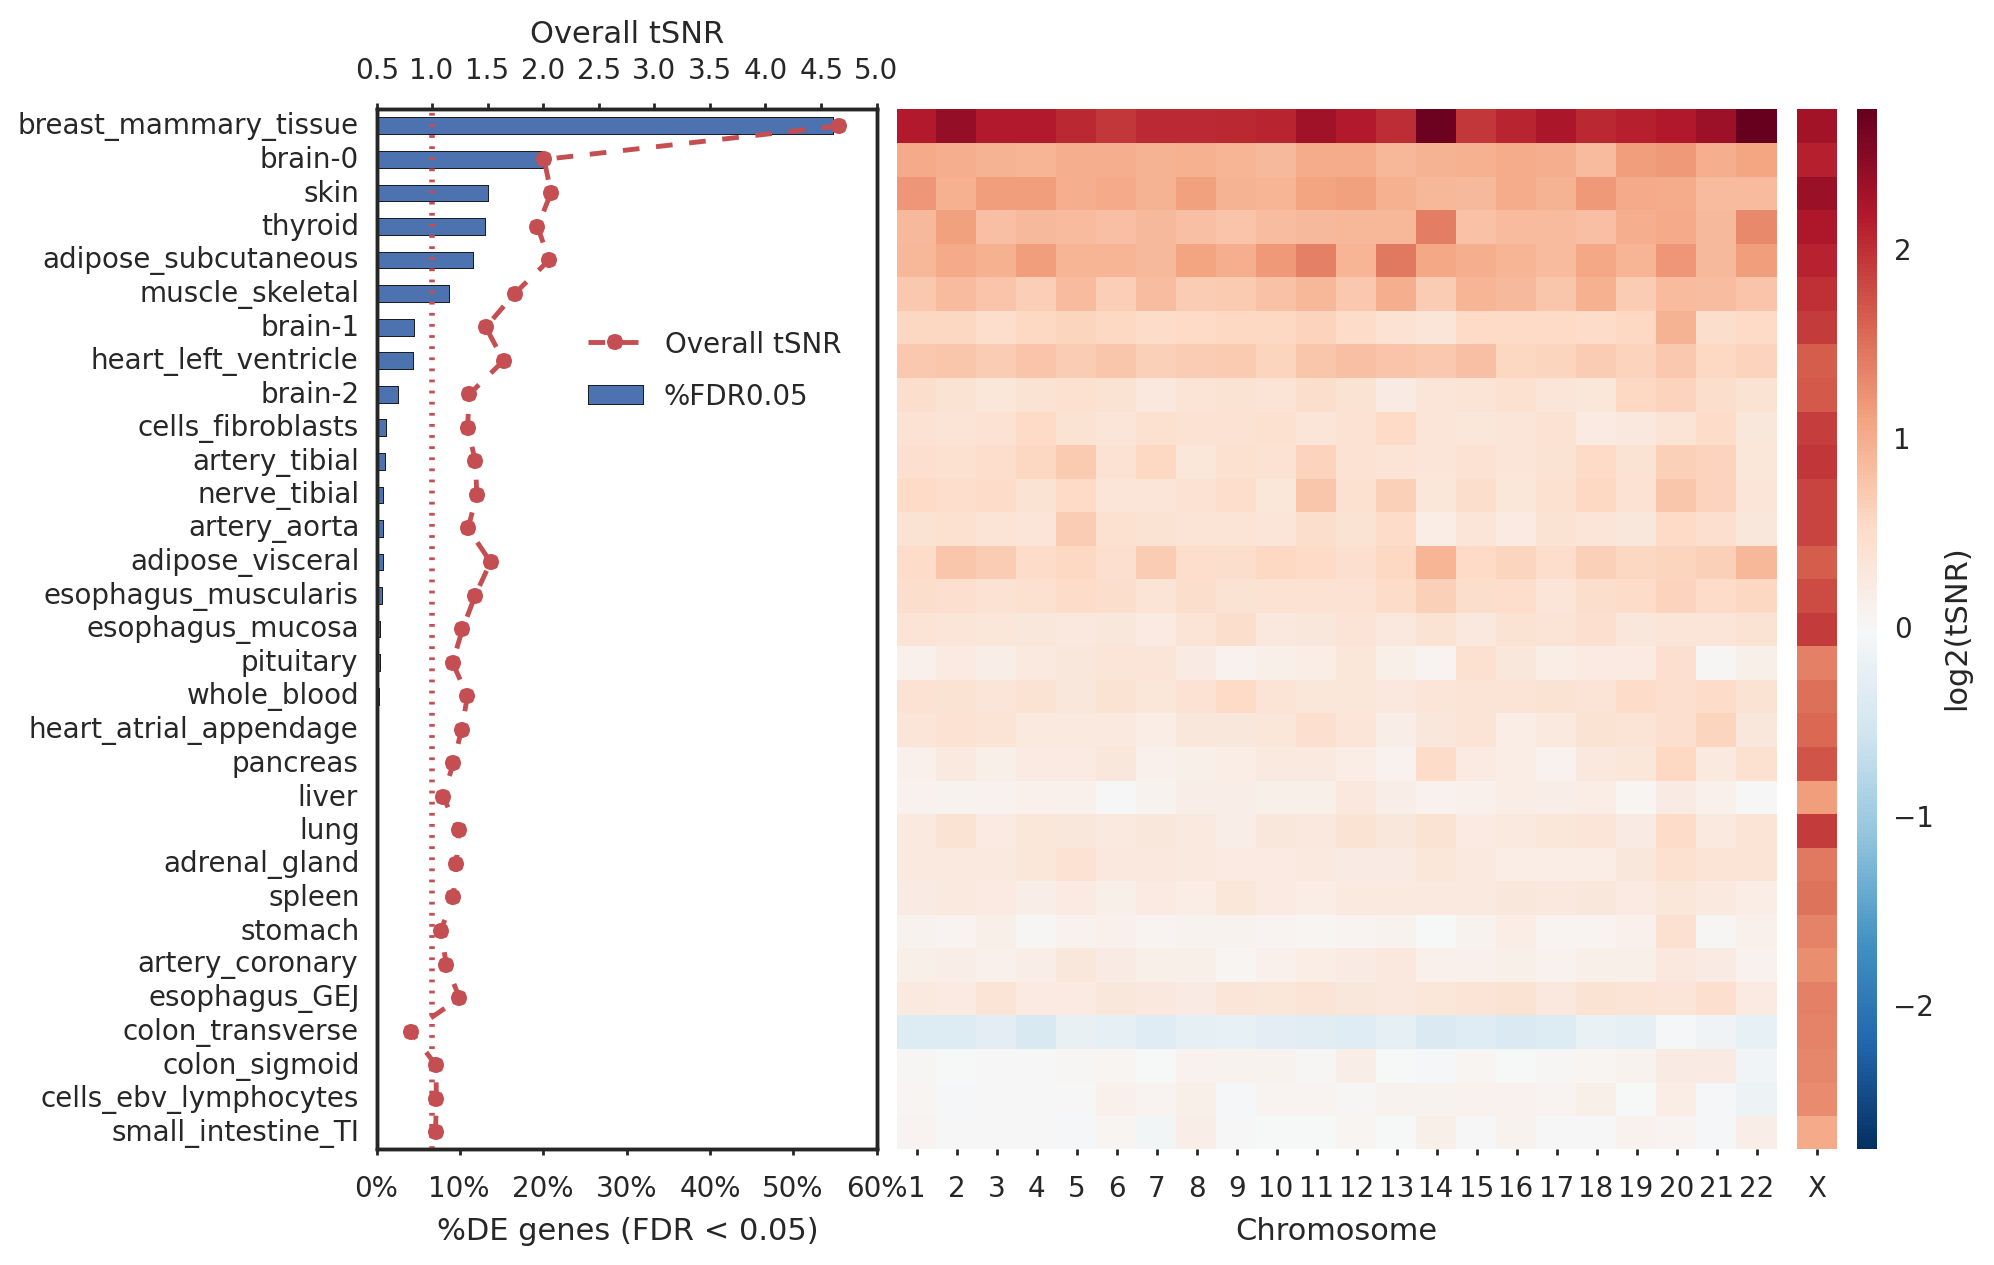

In [79]:
# figure layout
f, (ax1a, ax2, ax3, ax4) = subplots(1, 4, figsize=(10,6.5))
ax1b = twiny(ax1a)  # for the tSNR line plot

ax1a.set_position([0.20, 0.1, 0.25, 0.8])  # bar plot (%DE genes)
ax1b.set_position([0.20, 0.1, 0.25, 0.8])  # line plot (overall tSNR)
ax2.set_position([0.46, 0.1, 0.44, 0.8])   # heat map (chr 1-22)
ax3.set_position([0.91, 0.1, 0.02, 0.8])   # heat map (chr X)
ax4.set_position([0.94, 0.1, 0.01, 0.8])   # heat map color bar

# horizontal bar plot for %DE genes
ax = t.plot(y='%FDR0.05', kind='barh', ax=ax1a)
ax.set_xlabel("%DE genes (FDR < 0.05)")
ax.set_xticklabels(["%.0f%%" % (item * 100) for item in ax.get_xticks()])
ax.set_ylabel('')
ax.legend(loc=(.4, .7))
sns.set_style('ticks', {"xtick.major.size": 2, "ytick.major.size": 0})

# line plot for tSNR
ax1b.plot(t.TSNR, range(t.shape[0]), 'o--', ms=6, color=LINE_COLOR, label="Overall tSNR")
ax1b.set_xlabel("Overall tSNR")
ax1b.legend(loc=(.4, .75))
ax1b.axvline(1, lw=2, ls=':', color=LINE_COLOR)

# heatmap for chromosomal tSNR (linear scale)
# sns.heatmap(df2[chr_noxymt], ax=ax2, cbar=False, yticklabels=False, vmin=VMIN, vmax=VMAX)
# sns.heatmap(df2[["X"]], ax=ax3, cbar=True, cbar_ax=ax4, yticklabels=False, vmin=VMIN, vmax=VMAX)
# ax2.set_xlabel("Chromosome")
# ax4.set_ylabel('tSNR')

# heatmap for chromosomal tSNR (log scale)
df3 = log2(df2)
sns.heatmap(df3[chr_noxymt], ax=ax2, cbar=True, cbar_ax=ax4, yticklabels=False, vmin=VMIN, vmax=VMAX)
sns.heatmap(df3[["X"]], ax=ax3, cbar=False, yticklabels=False, vmin=VMIN, vmax=VMAX)
ax2.set_xlabel("Chromosome")
ax4.set_ylabel('log2(tSNR)')

# output
savefig('DE_bar_and_tSNR_heatmap.pdf')
savefig('DE_bar_and_tSNR_heatmap.dpi300.png', dpi=300)